# 1 вариант, Ягилев Иван
## Решение задачи Коши методом Рунге-Кутта 4-го порядка

### Постановка задачи:

Решить задачу Коши:

$
 \begin{cases}
   \ddot u + 2 v \dot u \omega \sin{u} = 0, 0 < t < t_N,
   \\
   u(0) = \pi / 2, \dot u (0) = 0
 \end{cases}
$

В качестве тестовой задачи использовать частный случай $v = 0$.
При численном решении в силу накопления ошибок вычисления фазовая траектория будет незамкнута даже при $v = 0$. Потребуем, чтобы незамыкание траектории удовлетворяло условию:

$|y_k - y_0| \le \epsilon = 0.002$, (1)

где $y_k = y(K\tau) = y(T), y_0 = u(0), T$ - период колебаний

Для того, чтобы найти шаг $\tau$, при котором численное решение задачи удовлетворяло условию (1) можно применить метод последовательных приближений. За начальное значение шага выберем $\tau = \frac{T}{K_0}$. Проинтегрируем на интервале $[0, T]$ и проверим выполнение условия (1). Если условие не выполняется, то уменьшим шаг $\tau = \frac{T}{K_0 + 10}$ и т.д. Найденный шаг применим при интегрировании исходной задачи $t_N = 3T$.

### Решение:

Введём замену

$
 \begin{cases}
   \dot y = z = V(t, y, z),
   \\
   \dot z = - 2 v z \omega \sin{y} = 0, 0 < t < t_N = U(t, y, z),
   \\
   y_0 = u(0) = \pi / 2, z_0 = \dot u (0) = 0
 \end{cases}
$

Получаем, что по методу Рунге-Кутта 4-го порядка:

$z_{i+1} = z_i + \frac{h}{6}(q_0 + 2q_1 + 2q_2 + q_3)$

$y_{i+1} = y_i + \frac{h}{6}(k_0 + 2k_1 + 2k_2 + k_3)$, где

$q_0 = U(y_i, z_i) ; k_0 = V(z_i)$

$q_1 = U(y_i + k_0\frac{h}{2}, z_i + q_0\frac{h}{2}) ; k_1 = V(z_i + q_0\frac{h}{2})$

$q_2 = U(y_i + k_1\frac{h}{2}, z_i + q_1\frac{h}{2}) ; k_2 = V(z_i + q_1\frac{h}{2})$

$q_3 = U(y_i + k_2h, z_i + q_2h) ; k_3 = V(z_i + q_2h)$

#### Тестовая задача

In [1]:
from math import sin, pi, log
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

omega, v = 11, 0

# z'
def U(y, z):
    return -2 * v * z - omega * omega * sin(y)

# y'
def V(z):
    return z

Условие выполнения необходимой точности:

$|y_k - y_0| \le \epsilon = 0.002$, где 

$y_k - y_0 = (z_{i+1} - z_i, y_{i+1} - y_i)^T$

In [2]:
# Реализация метода Рунге-Кутта 4-го порядка
def rk4(T, K0):
    eps = 0.002
    tau = T / K0
    # Начальные условия
    z_lst, y_lst = [0], [pi/2]
    tau_lst = [0]
    err_lst = [0]
    diff_lst = []    

    flag = False
    while tau_lst[-1] < T:
        q0 = U(y_lst[-1], z_lst[-1])
        k0 = V(z_lst[-1])

        q1 = U(y_lst[-1] + k0 * tau/2, z_lst[-1] + q0 * tau/2)
        k1 = V(z_lst[-1] + q0 * tau/2)

        q2 = U(y_lst[-1] + k1 * tau/2, z_lst[-1] + q1 * tau/2)
        k2 = V(z_lst[-1] + q1 * tau/2)

        q3 = U(y_lst[-1] + k2 * tau, z_lst[-1] + q2 * tau)
        k3 = V(z_lst[-1] + q2 * tau)

        zNext = z_lst[-1] + tau/6 * (q0 + 2*q1 + 2*q2 + q3)
        yNext = y_lst[-1] + tau/6 * (k0 + 2*k1 + 2*k2 + k3)

        err = abs((zNext-z_lst[-1])**2 + (yNext-y_lst[-1])**2)**0.5
        err_lst.append(err)

        z_lst.append(zNext)
        y_lst.append(yNext)
        tau_lst.append(tau_lst[-1] + tau)

        difference = abs(zNext-z_lst[0]) + abs(yNext-y_lst[0])
        diff_lst.append(difference)

        if difference <= eps:
            flag = True
    return tau_lst, y_lst, z_lst, flag, err_lst, diff_lst

Нахождение нужного шага $\tau$, при котором достигается требуемая точность для тестовой задачи:

In [3]:
K0 = 1
T = 1
while True:
    tau_lst, y_lst, z_lst, flag, err_lst, diff_lst = rk4(T, K0)
    if flag:
        break
    else:
        K0 += 10
print(f"K0 = {K0}\n")
print(f"Минимальное значение модуля разности k-го и нулевого шага = {min(diff_lst)}")

K0 = 221

Минимальное значение модуля разности k-го и нулевого шага = 0.00010209961464435757


Text(0, 0.5, 'Y')

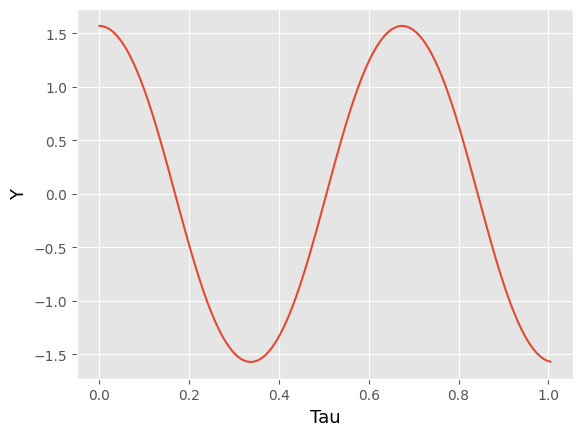

In [4]:
plt.plot(tau_lst, y_lst)
ax = plt.gca()
ax.set_xlabel("Tau", fontsize=13, color='black')
ax.set_ylabel("Y", fontsize=13, color='black')

Text(0, 0.5, 'Z')

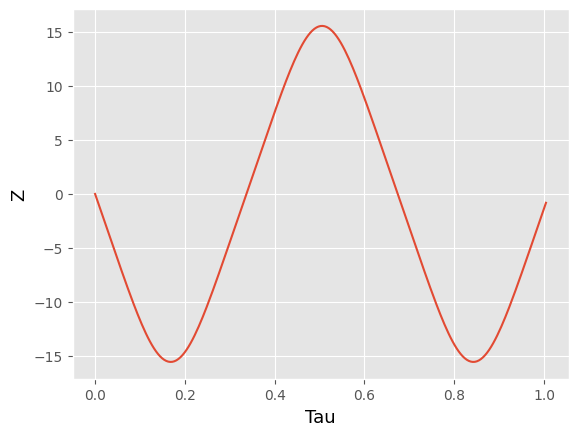

In [5]:
plt.plot(tau_lst, z_lst)
ax = plt.gca()
ax.set_xlabel("Tau", fontsize=13, color='black')
ax.set_ylabel("Z", fontsize=13, color='black')

Text(0, 0.5, 'Z')

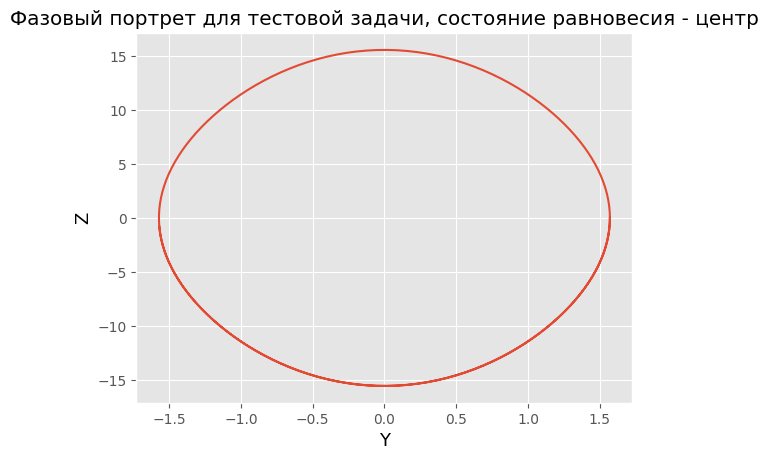

In [6]:
plt.plot(y_lst, z_lst)
plt.title("Фазовый портрет для тестовой задачи, состояние равновесия - центр")
ax = plt.gca()
ax.set_xlabel("Y", fontsize=13, color='black')
ax.set_ylabel("Z", fontsize=13, color='black')

Ошибка рассчитывается по формуле:

$||y_{i+1} - y_i||$

Text(0, 0.5, 'Ошибка')

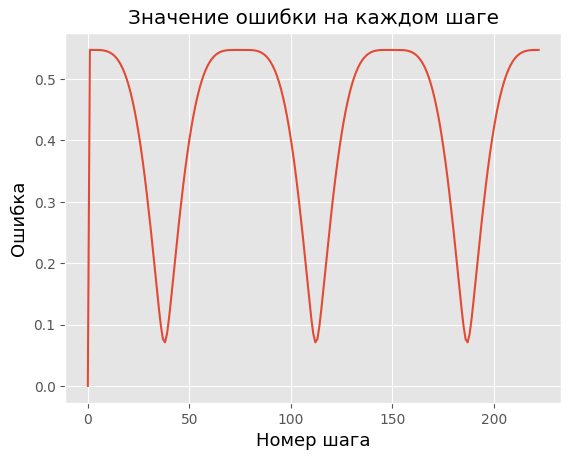

In [7]:
plt.plot([i for i in range(len(tau_lst))], err_lst)
plt.title("Значение ошибки на каждом шаге")
ax = plt.gca()
ax.set_xlabel("Номер шага", fontsize=13, color='black')
ax.set_ylabel("Ошибка", fontsize=13, color='black')

#### Исходная задача

Пусть $v \ne 0$, $t_N = 3T$

In [8]:
omega, v = 11, 4

tau_lst, y_lst, z_lst, flag, err_lst, diff_lst = rk4(3*T, K0)
print(f"Максимальное значение ошибки для исходной задачи c полученным в тестовой задаче шагом = {max(err_lst)}")

Максимальное значение ошибки для исходной задачи c полученным в тестовой задаче шагом = 1.5565013275925246


Text(0, 0.5, 'Y')

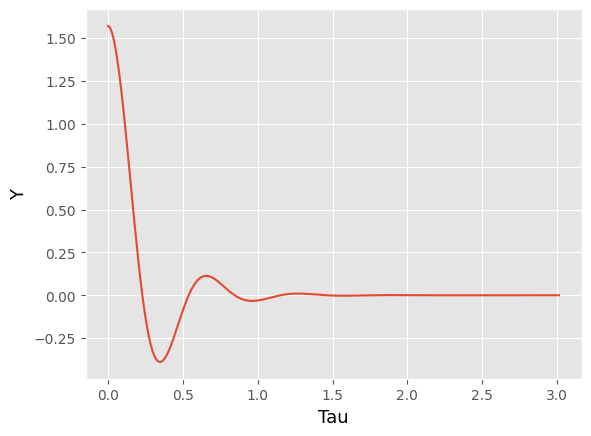

In [9]:
plt.plot(tau_lst, y_lst, label="y")
ax = plt.gca()
ax.set_xlabel("Tau", fontsize=13, color='black')
ax.set_ylabel("Y", fontsize=13, color='black')

Text(0, 0.5, 'Z')

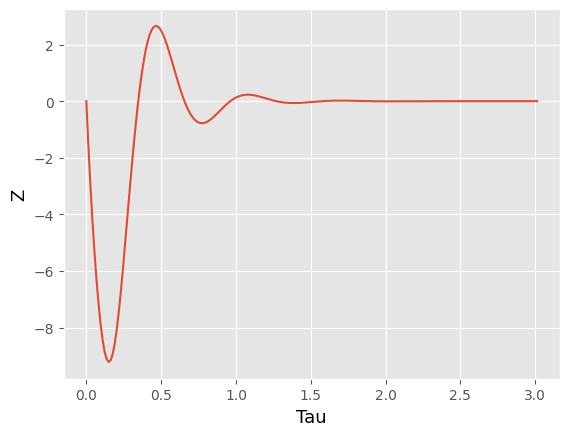

In [10]:
plt.plot(tau_lst, z_lst)
ax = plt.gca()
ax.set_xlabel("Tau", fontsize=13, color='black')
ax.set_ylabel("Z", fontsize=13, color='black')

Text(0, 0.5, 'Y')

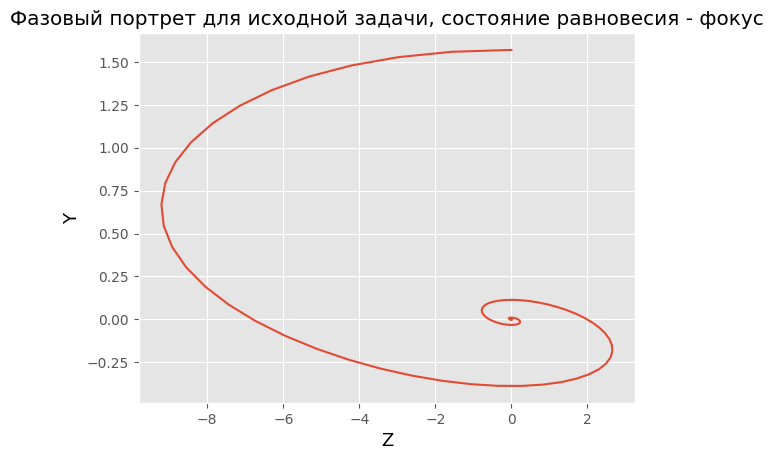

In [11]:
plt.plot(z_lst, y_lst)
plt.title("Фазовый портрет для исходной задачи, состояние равновесия - фокус")
ax = plt.gca()
ax.set_xlabel("Z", fontsize=13, color='black')
ax.set_ylabel("Y", fontsize=13, color='black')

Text(0, 0.5, 'Ошибка')

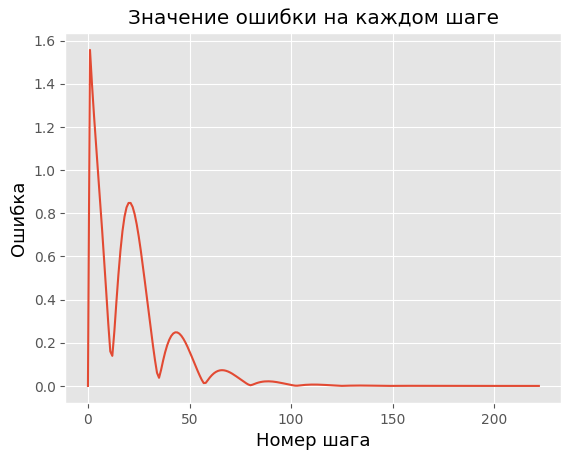

In [12]:
plt.plot([i for i in range(len(tau_lst))], err_lst)
plt.title("Значение ошибки на каждом шаге")
ax = plt.gca()
ax.set_xlabel("Номер шага", fontsize=13, color='black')
ax.set_ylabel("Ошибка", fontsize=13, color='black')

Уменьшим размер шага, чтобы уменьшить ошибку и убедиться в сходимости метода

Максимальное значение ошибки для исходной задачи c полученным в тестовой задаче шагом = 0.01641642389565815


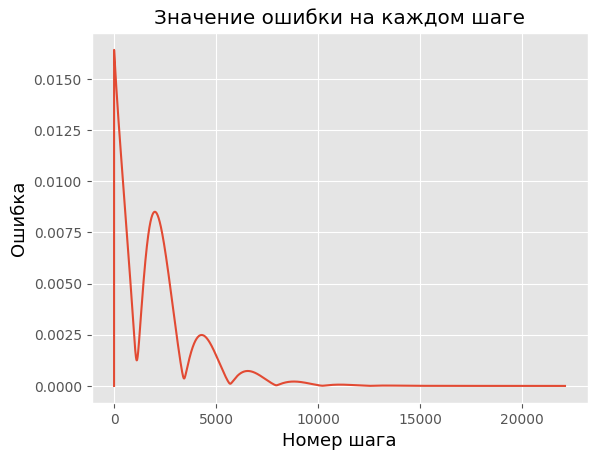

In [13]:
tau_lst, y_lst, z_lst, flag, err_lst, diff_lst = rk4(3*T, 100*K0)
plt.plot([i for i in range(len(tau_lst))], err_lst)
plt.title("Значение ошибки на каждом шаге")
ax = plt.gca()
ax.set_xlabel("Номер шага", fontsize=13, color='black')
ax.set_ylabel("Ошибка", fontsize=13, color='black')

print(f"Максимальное значение ошибки для исходной задачи c полученным в тестовой задаче шагом = {max(err_lst)}")

### Вывод:

Было успешно реализо решение задачи Коши методом Рунге-Кутта 4-го порядка, который обладает рядом преимуществ и недостатков.

Преимущества метода:
1. Высокая точность вычислений. Метод обладает 4-м порядком точности, что позволяет получать результаты с высокой степенью точности на относительно крупной сетке.
2. Универсальность. Метод Рунге-Кутта 4-го порядка эффективен на практике для большинства обыкновенных дифференциальных уравнений.
3. Устойчивость. При правильном выборе шага расчета данный метод обладает хорошей устойчивостью к численным возмущениям.

Недостатки метода:
1. Вычислительная сложность. По сравнению с методами меньшего порядка точности, метод Рунге-Кутта 4-го порядка требует более высоких затрат вычислительных ресурсов.
2. Неоптимальность для жестких систем. В случае жестких систем дифференциальных уравнений метод Рунге-Кутта 4-го порядка может оказаться не наилучшим выбором из-за особенностей поведения.

Таким образом, метод Рунге-Кутта 4-го порядка является мощным инструментом для численного решения обыкновенных дифференциальных уравнений, однако требует внимательного подхода к выбору параметров и адаптации к конкретной задаче.